In [1]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
#import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


In [2]:
import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
#importlib.reload(checkdata)


<module 'plotting' from '/home/marco/Projects/KatharinaMeier/Pupille/notebooks/plotting.py'>

In [57]:
import preprocessing
import plotting
import math
import os

importlib.reload(preprocessing)
importlib.reload(plotting)
#importlib.reload(checkdata)

def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass


if os.getlogin()=='marco':
    subject_id="PJ06_3_Ruhe"
    data_dir="/home/marco/Nextcloud/KatharinaBeispieldaten/"
else:
    subject_id="PJ15_1_Ruhe"
    data_dir="/Users/Katharina/Desktop/Beispieldaten"

field="diameter"
ts="pupil_timestamp"

config=preprocessing.create_process_config(0,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 

#config.validate_only=True

eye0=preprocessing.process(config,display)
display(eye0)

if False:
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what_pf in eye0.frames:
            if what_pf.valid:
                what=what_pf.data
                ts=what['pupil_timestamp'].iloc[0]
                plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
                plot(what,f"gated @{ts}","pupil_timestamp_based",f"{field}_gated")
                plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
                plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")

        if True:
            for what_pf in eye0.frames:
                if what_pf.valid:
                    what=what_pf.data
                plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")





'Starting process2'

'Loop through each annotation timestamp and slice the data'

'Label the data'

'preprocess and slice data'

'nanp before=0.0, nanp after=0.39158810732414795'

'nanp before=0.0, nanp after=47.01189440092834'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.3813559322033898'

'nanp before=0.0, nanp after=0.0'

'nanp before=0.0, nanp after=0.0'

ProcessResult(config=ProcessConfig(eyenum=0, column='diameter', sfactor=1, data_path='/home/marco/Nextcloud/KatharinaBeispieldaten/', subject_id='PJ06_3_Ruhe', condition='30Stim', timebase='30', stime_time_offset=0, after_var_start_offset=29, window_duration=59, nan_reconstruct_threshold=30, nan_before_threshold=0, nan_after_threshold=0, noise_threshold_factor=16, noise_rejection_percent=20, validate_only=False), num_valid=14, frames=[ProcessFrame(baseline_mean=20.36321000624941, baseline_std=1.9123811679548028, annotation_ts=9903.9788, zscore=-1.0310932119604939, valid=True, stage='finished', remark='', data=       pupil_timestamp  world_index  eye_id  confidence  norm_pos_x   
9046       9902.986090          572       0    0.405118    0.665096  \
9047       9902.986090          572       0    0.000000    0.000000   
9050       9902.994112          573       0    0.277070    0.657229   
9051       9902.994112          573       0    0.000000    0.000000   
9054       9903.002136      

'Anzahl der Messungen: 20'

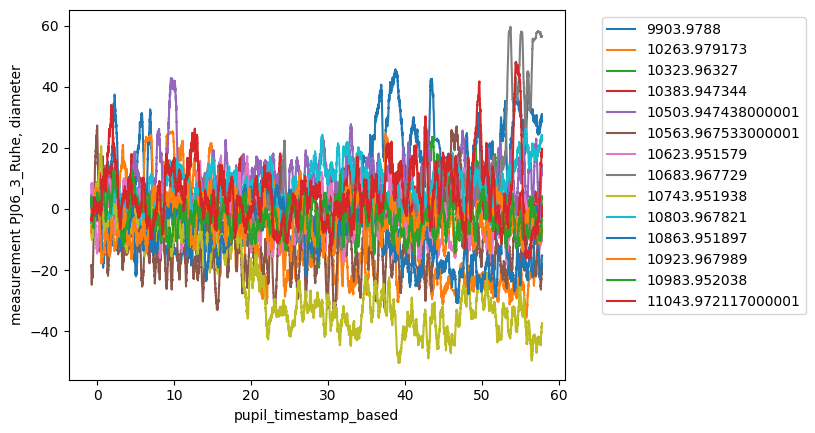

In [52]:
display(f"Anzahl der Messungen: {len(eye0.frames)}")
sub=None
i=0
for what_pf in eye0.frames:
    #display(what_pf)
    if what_pf.valid:
        what=what_pf.data
        ts=what_pf.annotation_ts
        # ts=what['pupil_timestamp'].iloc[0]
        # preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
        sub=what.plot(ax=sub, x='pupil_timestamp_based', y=f'{field}_baseline', ylabel='baseline adjusted pupil size', kind='line',label=ts)
        sub.set_ylabel(f'measurement {subject_id}, {field}')
         # Adjust the position of the legend
        legend = sub.legend()
        legend.set_bbox_to_anchor((1.5, 1))  # Adjust the position of the legend box

14

20

[(9903.9788, -1.0310932119604939, 'finished', ''),
 (9963.962917,
  None,
  'slice',
  'measurement @9963.962917 has 20.559139784946236% noise data. Rejecting'),
 (10023.978852,
  None,
  'preprocess',
  'measurement @10023.978852 has 47.01189440092834% more noise data after blinkreconstruct. Rejecting'),
 (10083.963085, 2.530635675967134, 'zscore', 'zscore not in range -2..2'),
 (10143.979037000001,
  None,
  'slice',
  'measurement @10143.979037000001 has 23.04969559677191% noise data. Rejecting'),
 (10203.963207,
  None,
  'slice',
  'measurement @10203.963207 has 27.624662594118483% noise data. Rejecting'),
 (10263.979173, 1.0234863253501398, 'finished', ''),
 (10323.96327, -0.23412934698674429, 'finished', ''),
 (10383.947344, -0.45628153552018436, 'finished', ''),
 (10443.967351000001,
  None,
  'slice',
  'measurement @10443.967351000001 has 47.16967612496417% noise data. Rejecting'),
 (10503.947438000001, -1.1081081242215842, 'finished', ''),
 (10563.967533000001, 0.42266653116

(array([3., 3., 4., 0., 2., 1., 0., 1., 0., 1.]),
 array([-1.10810812, -0.74423374, -0.38035936, -0.01648498,  0.3473894 ,
         0.71126378,  1.07513816,  1.43901254,  1.80288692,  2.1667613 ,
         2.53063568]),
 <BarContainer object of 10 artists>)

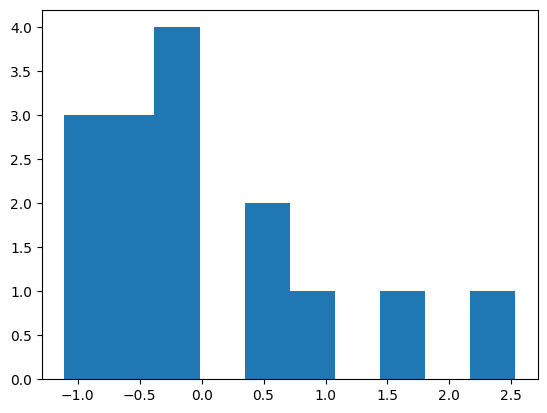

In [58]:
display(eye0.num_valid, len(eye0.frames))
display([(f.annotation_ts,f.zscore,f.stage,f.remark) for f in eye0.frames])

zscores=[f.zscore for f in eye0.frames if f.valid or f.stage=="zscore"]
plt.hist(zscores)

In [62]:
preprocessing.save_pickle(f"{eye0.config.subject_id}.pickle",eye0)


In [60]:
f=preprocessing.load_pickle("hello.pickle")

In [61]:
display(len(f.frames))

20

Hallo *wie gehts*

In [123]:
display(eye0)

ProcessResult(config=ProcessConfig(eyenum=0, column='diameter', sfactor=1, data_path='/home/marco/Nextcloud/KatharinaBeispieldaten/', subject_id='PJ11_4_Ruhe', condition='3.4Stim', timebase='3.4', start_time_offset=0, end_time_offset=0, window_duration=29, upper_threshold=150, lower_threshold=40, nan_reconstruct_threshold=30, noise_threshold_factor=16, noise_rejection_percent=20, validate_only=False))